In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
#Create dataframe and keep columns required for data analysis
medical_df=pd.read_csv('medical_clean.csv', usecols=['Income', 'Gender', 'Age', 'VitD_levels', 'HighBlood', 'Stroke','Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'TotalCharge', 'Additional_charges', 'Initial_admin' ])

In [4]:

medical_df

,Age,Income,Gender,VitD_levels,Initial_admin,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,TotalCharge,Additional_charges
0,53,86575.93,Male,19.141466,Emergency Admission,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,3726.702860,17939.403420
1,51,46805.99,Female,18.940352,Emergency Admission,Yes,No,Yes,No,No,No,No,No,No,Yes,No,4193.190458,17612.998120
2,53,14370.14,Female,18.057507,Elective Admission,Yes,No,Yes,No,Yes,No,No,No,No,No,No,2434.234222,17505.192460
3,78,39741.49,Male,16.576858,Elective Admission,No,Yes,No,Yes,No,No,No,No,No,Yes,Yes,2127.830423,12993.437350
4,22,1209.56,Female,17.439069,Elective Admission,No,No,No,No,No,Yes,No,No,Yes,No,No,2113.073274,3716.525786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25,45967.61,Male,16.980860,Emergency Admission,Yes,No,No,No,No,No,No,Yes,No,Yes,No,6850.942000,8927.642000
9996,87,14983.02,Male,18.177020,Elective Admission,Yes,No,Yes,Yes,Yes,No,No,No,No,No,Yes,7741.690000,28507.150000
9997,45,65917.81,Female,17.129070,Elective Admission,Yes,No,Yes,No,No,No,No,Yes,Yes,No,No,8276.481000,15281.210000
9998,43,29702.32,Male,19.910430,Emergency Admission,No,No,Yes,No,No,No,Yes,No,No,No,No,7644.483000,7781.678000


In [5]:
#Display column names
print(medical_df.columns)

Index(['Age', 'Income', 'Gender', 'VitD_levels', 'Initial_admin', 'HighBlood',
       'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia',
       'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis',
       'Asthma', 'TotalCharge', 'Additional_charges'],
      dtype='object')


In [6]:
medical_df.shape

(10000, 18)

In [7]:
#Check for missing data
medical_df.isnull().sum()

Age                   0
Income                0
Gender                0
VitD_levels           0
Initial_admin         0
HighBlood             0
Stroke                0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
TotalCharge           0
Additional_charges    0
dtype: int64

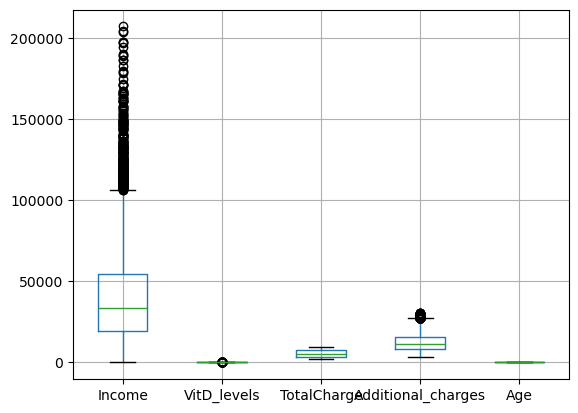

In [8]:
#Univariate statistics for continuous data
#Identify outliers for Income Vitamin D levels, Total and Additional charges
medical_df[['Income', 'VitD_levels', 'TotalCharge', 'Additional_charges', 'Age']].boxplot()
plt.show()

In [9]:
#Let's view the values for income
medical_df['Income'].describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

Calculate the Interquarantile Range (IQR) IQR= 75th - 25th percentile IQR =  54296.402500- 19598.775000 = 34697.627499999995

Lower bound = 25th percentile - 1.5 * IQ
R Upper bound = 75th percentile + 1.5 * IQR

Calculate the boun
ds: Lower Bou19598.775000 - 1.5 * 34697.627499999995 = -32447.666249999987
.80 Upper Bou54296.402500 + 1.5 * 34697.627499999995 = 106342.84374999999

- **Potential Outliers**: The maximum income value of 207249.100000 is far above the upper bound of 106342.84374999999, indicating potential outliers on the higher end of the income distribution.2.77

In [11]:
#mitigate the outlier for Income column
# Check for any unexpected tuple-like entries, should return 0 if there are no tuple like rows
medical_df['Income'].apply(lambda x: isinstance(x, tuple)).sum()

0

In [12]:
upper_cap_medical = 106342.84
print(type(upper_cap_medical))

<class 'float'>


In [13]:

# Apply the cap
medical_df['Income'] = medical_df['Income'].apply(lambda x: min(x, upper_cap_medical))
print(medical_df['Income'].max()) 


106342.84


In [14]:
print(medical_df['Income'].max()) 

106342.84


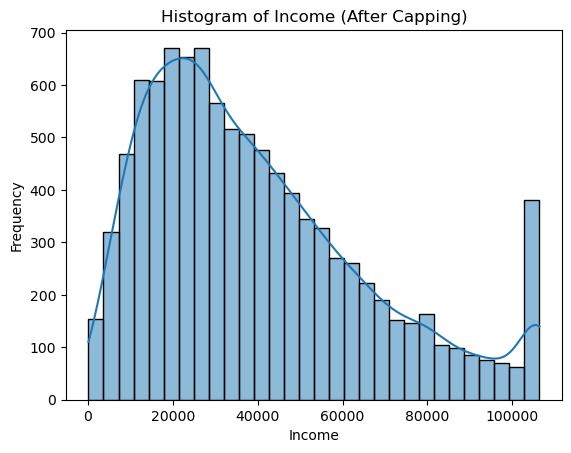

In [15]:
#Histogram for Income after capping
sns.histplot(medical_df['Income'], bins=30, kde=True)

plt.title('Histogram of Income (After Capping)')
plt.xlabel('Income')
plt.ylabel('Frequency')

plt.show()

In [16]:
medical_df.Income.describe()

count     10000.000000
mean      39721.119187
std       26029.788858
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      106342.840000
Name: Income, dtype: float64

In [17]:
#Let's view values for Vitamin D levels
medical_df['VitD_levels']. describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

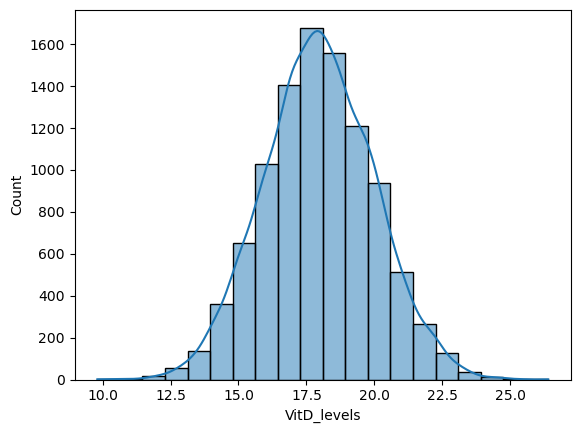

In [18]:
#Histogram for Vitamin D levels
sns.histplot(medical_df['VitD_levels'], bins=20, kde=True)
plt.show()

For the Vitamin D levels, the minimum value is 9.8 and the maximum value of 26.40 seems legitimate. Thus, it will remain.

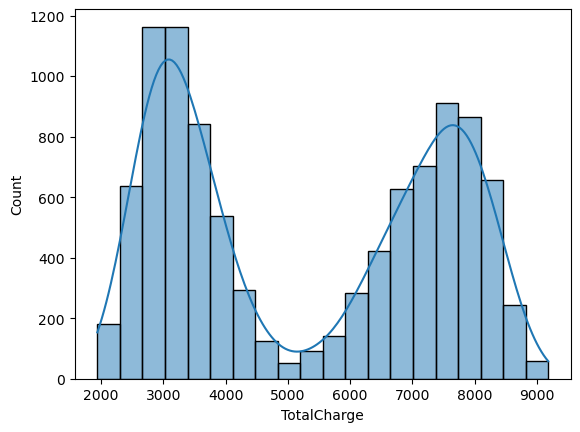

In [20]:
#Histogram to explore Total Charge
sns.histplot(medical_df['TotalCharge'], bins=20, kde=True)
plt.show()

In [21]:
medical_df.TotalCharge.describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

In [22]:
#Let's view the values for Additional charges
medical_df['Additional_charges'].describe()

count    10000.000000
mean     12934.528587
std       6542.601544
min       3125.703000
25%       7986.487755
50%      11573.977735
75%      15626.490000
max      30566.070000
Name: Additional_charges, dtype: float64

Calculate the Interquarantile Range (IQR) IQR= 75th - 25th percentile IQR = 15626.490000 - 7986.487755 = 7,640.00

Lower bound = 25th percentile - 1.5 * IQ 
R Upper bound = 75th percentile + 1.5 * IQR

Calculate the boun 
ds: Lowernd = -3,473.52 
.80 Uppernd = 27,086.499999

Potential Outliers: The maadditional chargesincome val30566.070000100000 is far above the upper bo  27,086.4999999, indicating potential outliers on the higher end of the income distrin.2.77

In [24]:
#mitigate the outlier for Additional charges column
# Check for any unexpected tuple-like entries, should return 0 if there are no tuple like rows
medical_df['Additional_charges'].apply(lambda x: isinstance(x, tuple)).sum()

0

In [25]:
upper_cap_addc = 27086.49
print(type(upper_cap_addc))

<class 'float'>


In [26]:
# Apply the cap
medical_df['Additional_charges'] = medical_df['Additional_charges'].apply(lambda x: min(x, upper_cap_addc))
print(medical_df['Additional_charges'].max()) 

27086.49


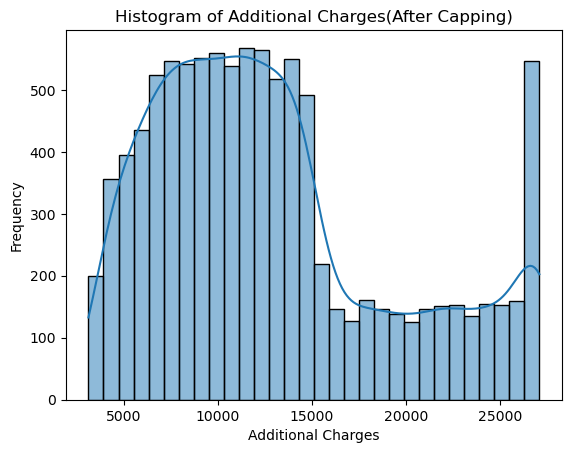

In [27]:
#Histogram after capping
sns.histplot(medical_df['Additional_charges'], bins=30, kde=True)

plt.title('Histogram of Additional Charges(After Capping)')
plt.xlabel('Additional Charges')
plt.ylabel('Frequency')

plt.show()

In [28]:
medical_df.Additional_charges.describe()

count    10000.000000
mean     12881.862164
std       6420.448339
min       3125.703000
25%       7986.487755
50%      11573.977735
75%      15626.490000
max      27086.490000
Name: Additional_charges, dtype: float64

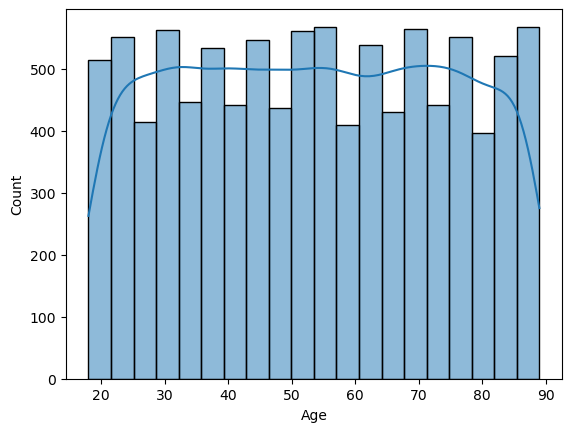

In [29]:
#Histogram for Age
sns.histplot(medical_df['Age'], bins=20, kde=True)
plt.show()

In [30]:
medical_df.Age.describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [31]:
print(medical_df.columns)

Index(['Age', 'Income', 'Gender', 'VitD_levels', 'Initial_admin', 'HighBlood',
       'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia',
       'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis',
       'Asthma', 'TotalCharge', 'Additional_charges'],
      dtype='object')


In [32]:
#Frequency table for Gender
pd.crosstab(index=medical_df['Gender'], columns='count')

col_0,count
Gender,
Female,5018
Male,4768
Nonbinary,214


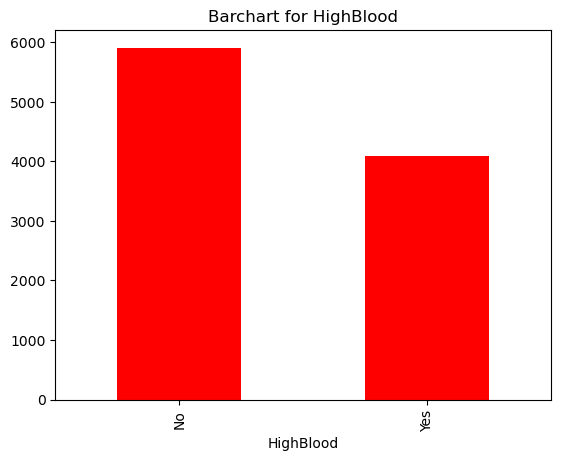

In [33]:
#Barchart for HighBlood
medical_df['HighBlood'].value_counts().plot(kind='bar', color='red')
plt.title("Barchart for HighBlood")
plt.show()

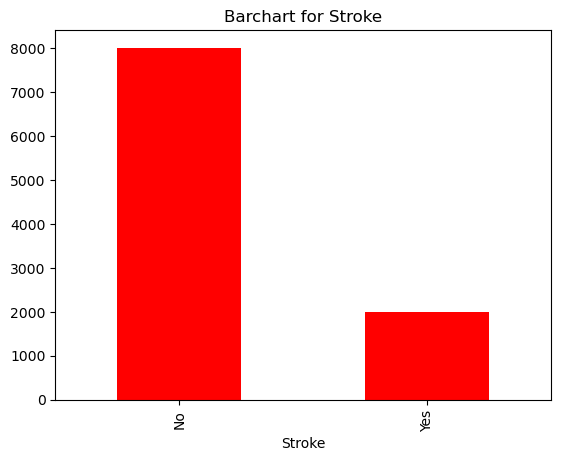

In [34]:
#Barchart for Stroke
medical_df['Stroke'].value_counts().plot(kind='bar', color='red')
plt.title("Barchart for Stroke")
plt.show()

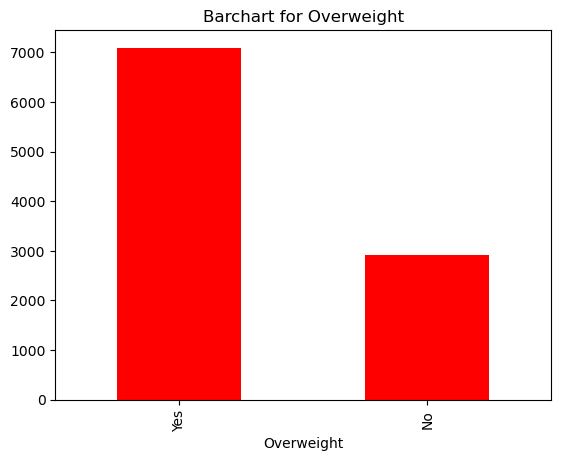

In [35]:
#Barchart for Overweight
medical_df['Overweight'].value_counts().plot(kind='bar', color='red')
plt.title("Barchart for Overweight")
plt.show()

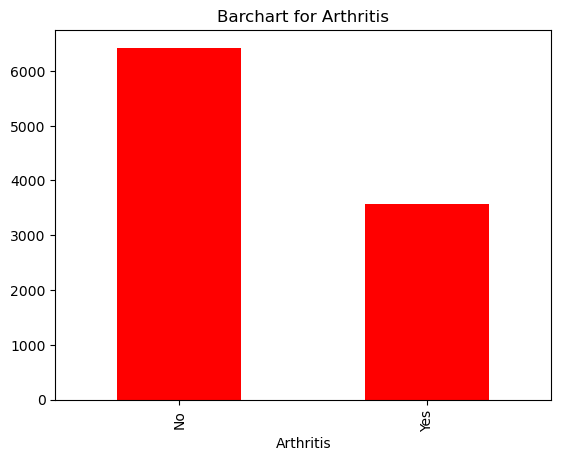

In [36]:
#Barchart for Arthritis
medical_df['Arthritis'].value_counts().plot(kind='bar', color='red')
plt.title("Barchart for Arthritis")
plt.show()

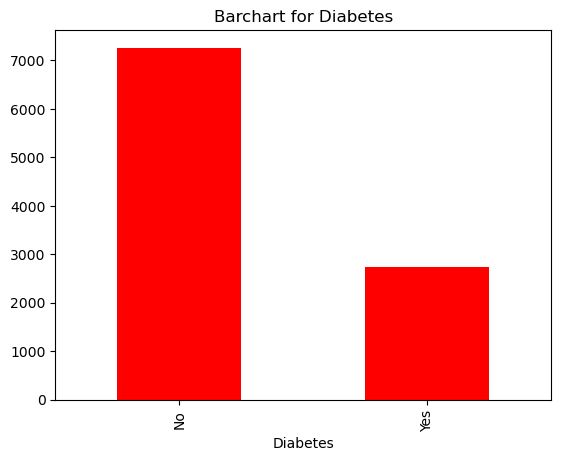

In [37]:
#Barchart for Diabetes
medical_df['Diabetes'].value_counts().plot(kind='bar', color='red')
plt.title("Barchart for Diabetes")
plt.show()

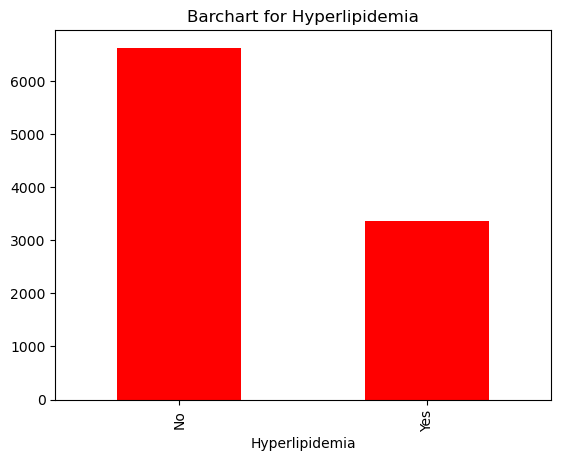

In [38]:
#Barchart for Hyperlipidemia
medical_df['Hyperlipidemia'].value_counts().plot(kind='bar', color='red')
plt.title("Barchart for Hyperlipidemia")
plt.show()

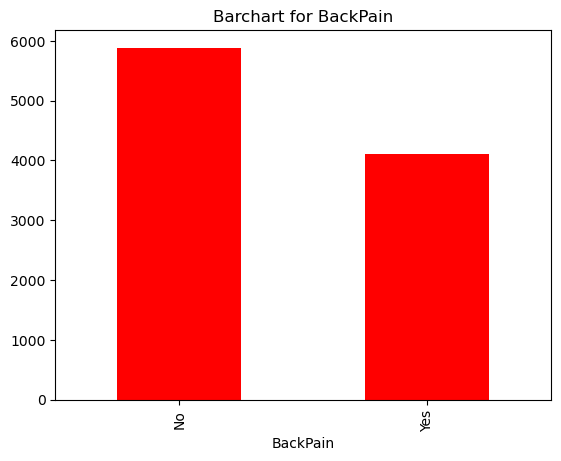

In [39]:
#Barchart for BackPain
medical_df['BackPain'].value_counts().plot(kind='bar', color='red')
plt.title("Barchart for BackPain")
plt.show()

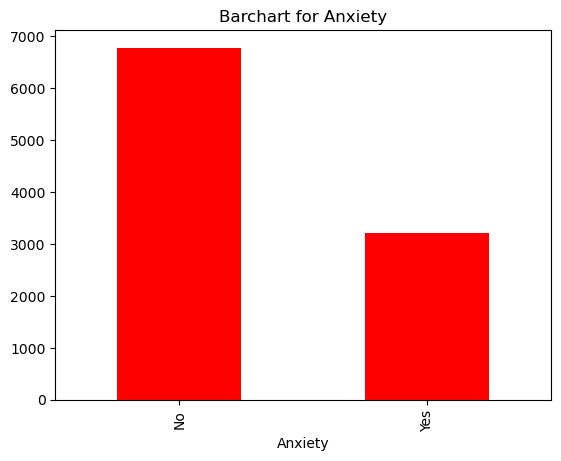

In [40]:
#Barchart for Anxiety
medical_df['Anxiety'].value_counts().plot(kind='bar', color='red')
plt.title("Barchart for Anxiety")
plt.show()

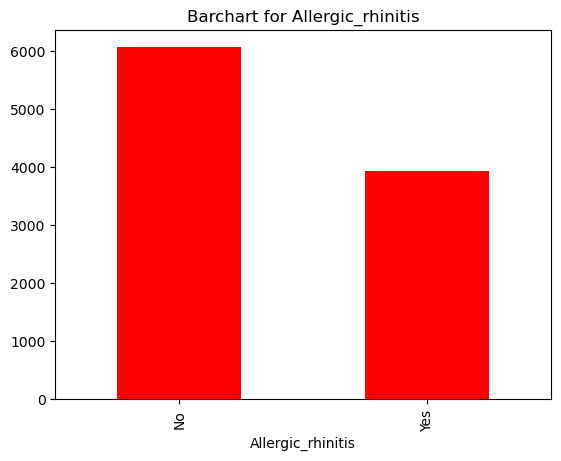

In [41]:
#Barchart for Allergic_rhinitis
medical_df['Allergic_rhinitis'].value_counts().plot(kind='bar', color='red')
plt.title("Barchart for Allergic_rhinitis")
plt.show()

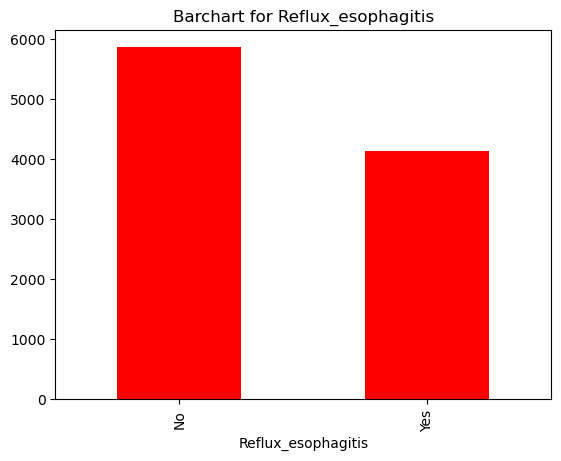

In [42]:
#Barchart for Reflux_esophagitis
medical_df['Reflux_esophagitis'].value_counts().plot(kind='bar', color='red')
plt.title("Barchart for Reflux_esophagitis")
plt.show()

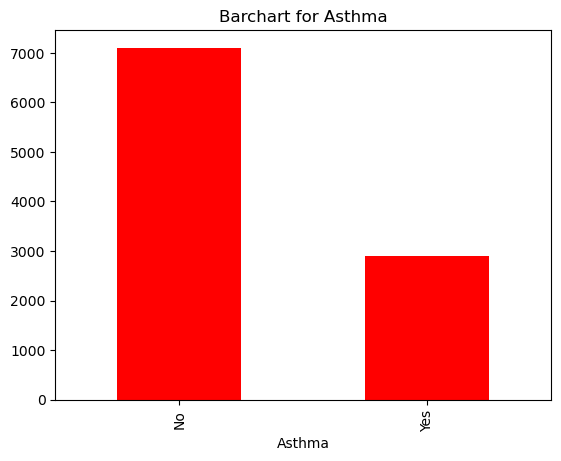

In [43]:
#Barchart for Asthma
medical_df['Asthma'].value_counts().plot(kind='bar', color='red')
plt.title("Barchart for Asthma")
plt.show()

In [44]:
#Frequency table for Initial Admission
pd.crosstab(index=medical_df['Initial_admin'], columns='count')

col_0,count
Initial_admin,
Elective Admission,2504
Emergency Admission,5060
Observation Admission,2436


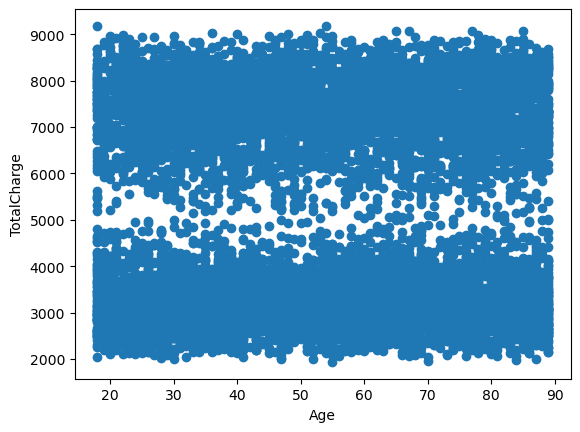

In [45]:
#Bivariate statistics to get an idea of the linear relationships with the target variable
#Here are the scatter plots of selected numeric data vs. the target variable of 'TotalCharge. 
#One of the assumptions is that independent and dependent variables are linear, so I am looking for linear relationships here.
#Scatterplot between Age and TotalCharge
plt.scatter(medical_df['Age'], medical_df['TotalCharge'])
plt.xlabel('Age')
plt.ylabel('TotalCharge')
plt.show()

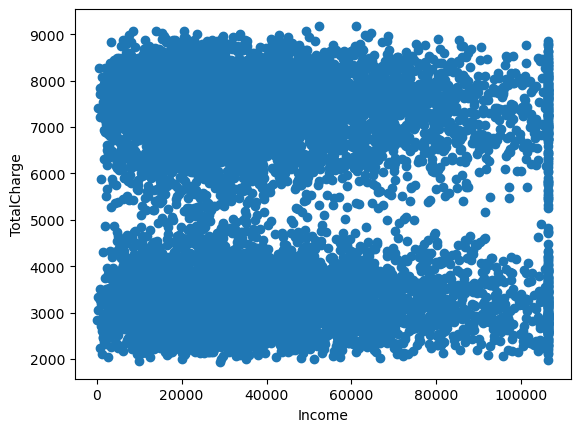

In [46]:
#Scatterplot between Income and TotalCharge
plt.scatter(medical_df['Income'], medical_df['TotalCharge'])
plt.xlabel('Income')
plt.ylabel('TotalCharge')
plt.show()

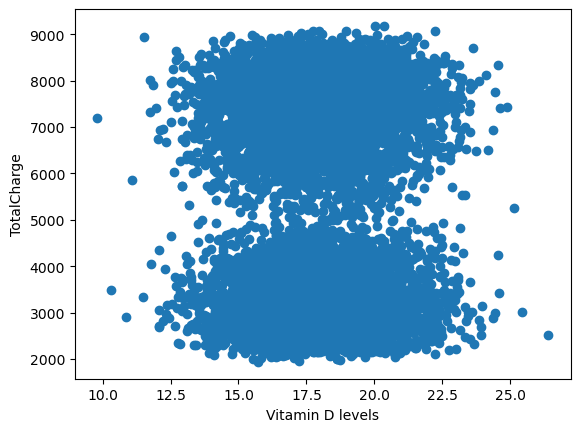

In [47]:
#Scatterplot between Vitamin D levels and TotalCharge
plt.scatter(medical_df['VitD_levels'], medical_df['TotalCharge'])
plt.xlabel('Vitamin D levels')
plt.ylabel('TotalCharge')
plt.show()

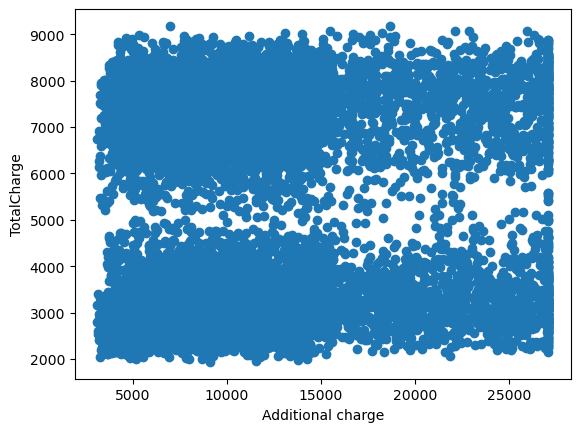

In [48]:
#Scatterplot between Age and TotalCharge
plt.scatter(medical_df['Additional_charges'], medical_df['TotalCharge'])
plt.xlabel('Additional charge')
plt.ylabel('TotalCharge')
plt.show()

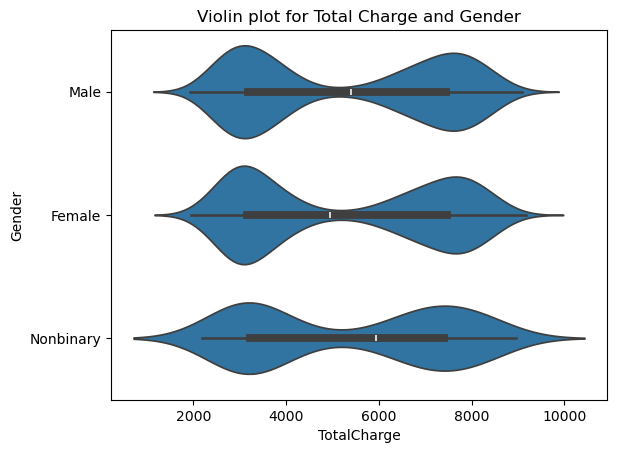

In [49]:
#Violin plot for Total charge and Gender
sns.violinplot(data=medical_df, x="TotalCharge", y='Gender')
plt.title('Violin plot for Total Charge and Gender')
plt.show()

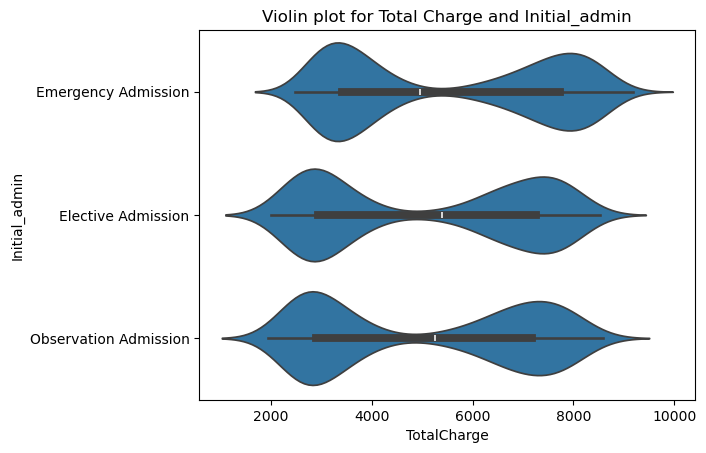

In [50]:
#Violin plot for Total charge and Initial_admin
sns.violinplot(data=medical_df, x="TotalCharge", y='Initial_admin')
plt.title('Violin plot for Total Charge and Initial_admin')
plt.show()

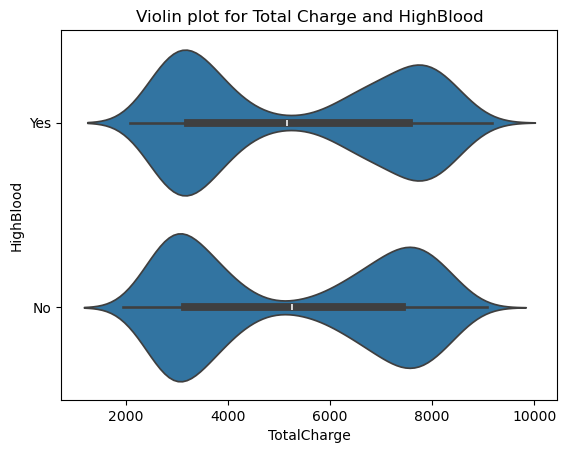

In [51]:
#Violin plot for Total charge and HighBlood
sns.violinplot(data=medical_df, x="TotalCharge", y='HighBlood')
plt.title('Violin plot for Total Charge and HighBlood')
plt.show()

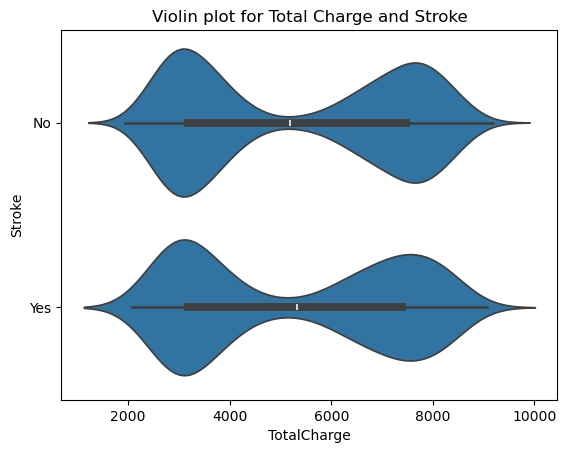

In [52]:
#Violin plot for Total charge and Stroke
sns.violinplot(data=medical_df, x="TotalCharge", y='Stroke')
plt.title('Violin plot for Total Charge and Stroke')
plt.show()

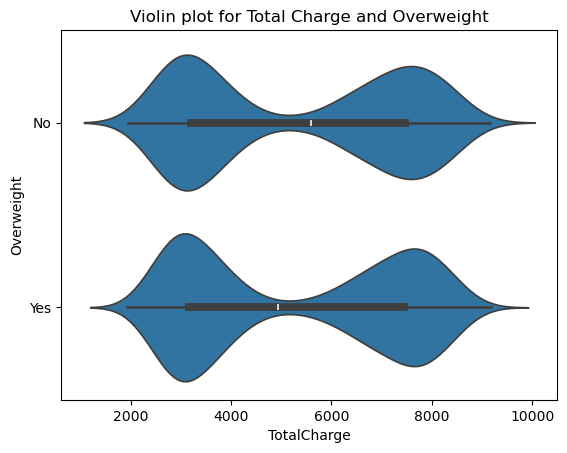

In [53]:
#Violin plot for Total charge and Overweight
sns.violinplot(data=medical_df, x="TotalCharge", y='Overweight')
plt.title('Violin plot for Total Charge and Overweight')
plt.show()

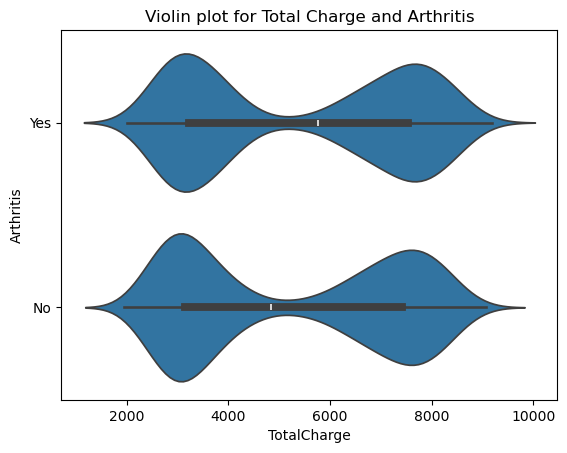

In [54]:
#Violin plot for Total charge and Arthritis
sns.violinplot(data=medical_df, x="TotalCharge", y='Arthritis')
plt.title('Violin plot for Total Charge and Arthritis')
plt.show()

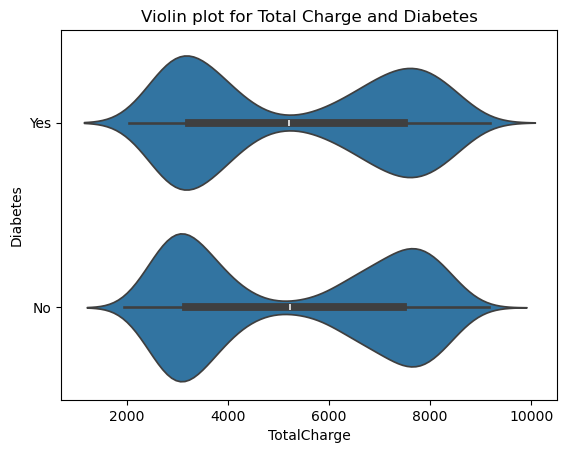

In [55]:
#Violin plot for Total charge and Diabetes
sns.violinplot(data=medical_df, x="TotalCharge", y='Diabetes')
plt.title('Violin plot for Total Charge and Diabetes')
plt.show()

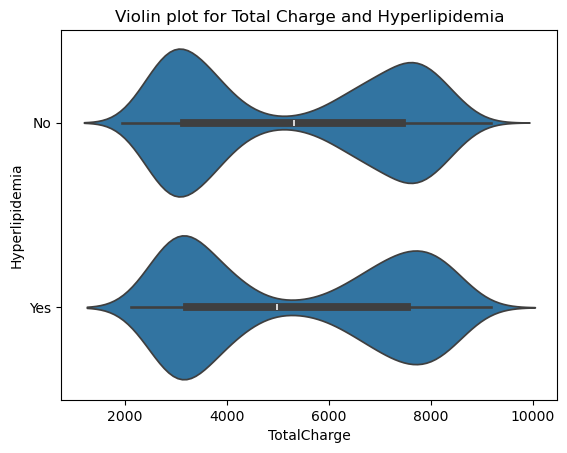

In [56]:
#Violin plot for Total charge and Hyperlipidemia
sns.violinplot(data=medical_df, x="TotalCharge", y='Hyperlipidemia')
plt.title('Violin plot for Total Charge and Hyperlipidemia')
plt.show()

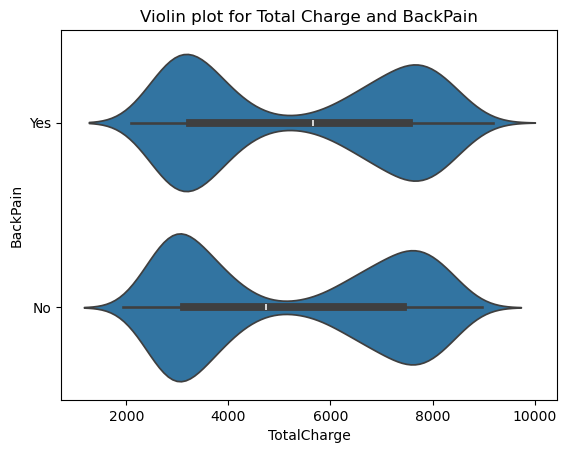

In [57]:
#Violin plot for Total charge and BackPain
sns.violinplot(data=medical_df, x="TotalCharge", y='BackPain')
plt.title('Violin plot for Total Charge and BackPain')
plt.show()

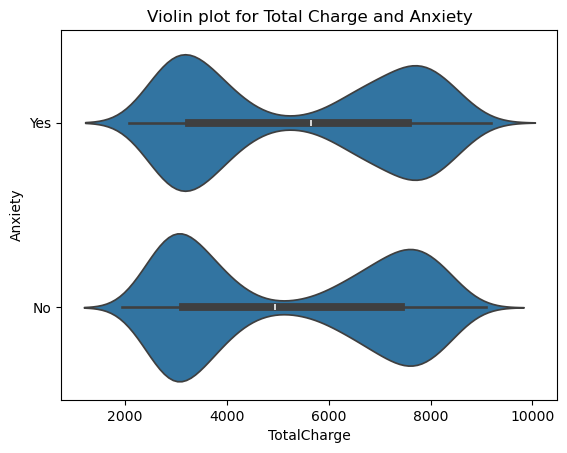

In [58]:
#Violin plot for Total charge and Anxiety
sns.violinplot(data=medical_df, x="TotalCharge", y='Anxiety')
plt.title('Violin plot for Total Charge and Anxiety')
plt.show()

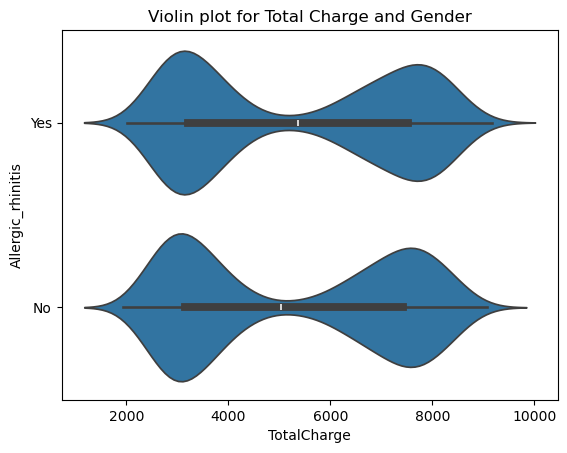

In [59]:
#Violin plot for Total charge and Allergic_rhinitis
sns.violinplot(data=medical_df, x="TotalCharge", y='Allergic_rhinitis')
plt.title('Violin plot for Total Charge and Gender')
plt.show()

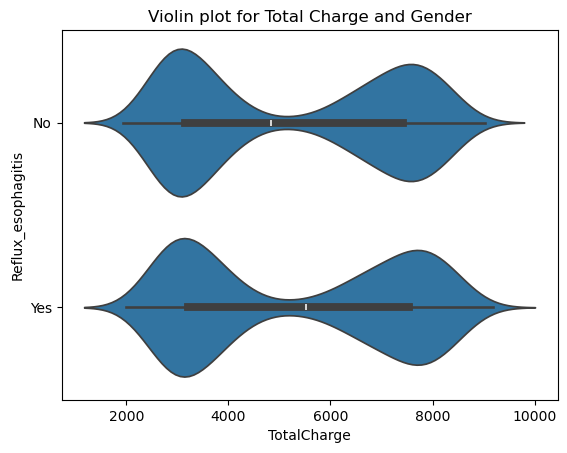

In [60]:
#Violin plot for Total charge and Reflux_esophagitis'
sns.violinplot(data=medical_df, x="TotalCharge", y='Reflux_esophagitis')
plt.title('Violin plot for Total Charge and Gender')
plt.show()

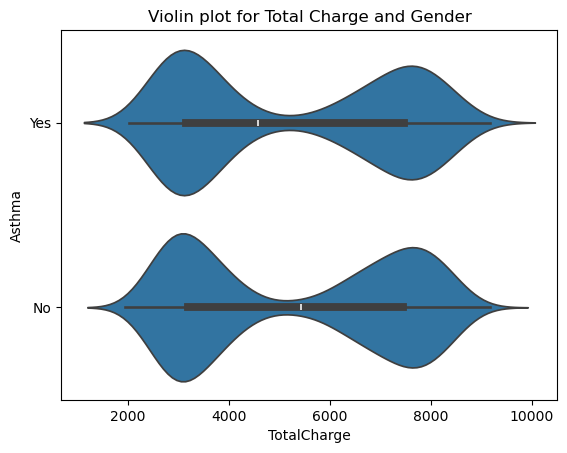

In [61]:
#Violin plot for Total charge and Asthma
sns.violinplot(data=medical_df, x="TotalCharge", y='Asthma')
plt.title('Violin plot for Total Charge and Gender')
plt.show()

In [62]:
#Observe the categorical data values
medical_df['Gender'].value_counts()

Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64

In [63]:
medical_df['Initial_admin'].value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

In [64]:
medical_df = pd.get_dummies(medical_df, columns = ['Gender', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Initial_admin'], drop_first = True, dtype=int)

In [65]:
medical_df

,Age,Income,VitD_levels,TotalCharge,Additional_charges,Gender_Male,Gender_Nonbinary,HighBlood_Yes,Stroke_Yes,Overweight_Yes,Arthritis_Yes,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,Asthma_Yes,Initial_admin_Emergency Admission,Initial_admin_Observation Admission
0,53,86575.93,19.141466,3726.702860,17939.403420,1,0,1,0,0,1,1,0,1,1,1,0,1,1,0
1,51,46805.99,18.940352,4193.190458,17612.998120,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
2,53,14370.14,18.057507,2434.234222,17505.192460,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
3,78,39741.49,16.576858,2127.830423,12993.437350,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0
4,22,1209.56,17.439069,2113.073274,3716.525786,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25,45967.61,16.980860,6850.942000,8927.642000,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0
9996,87,14983.02,18.177020,7741.690000,27086.490000,1,0,1,0,1,1,1,0,0,0,0,0,1,0,0
9997,45,65917.81,17.129070,8276.481000,15281.210000,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0
9998,43,29702.32,19.910430,7644.483000,7781.678000,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [66]:
medical_df.to_csv('medical_clean_1.csv', index=False)

In [67]:
df=pd.read_csv('medical_clean_1.csv')

In [68]:
#Develop the initial estimated regression equation that could be used to predict the TotalCharge
X = df[['Age', 'Income', 'VitD_levels', 'Additional_charges', 'Gender_Male', 'Gender_Nonbinary', 'HighBlood_Yes', 'Stroke_Yes', 'Overweight_Yes', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes', 'Reflux_esophagitis_Yes', 'Asthma_Yes', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission']] #Independent variables
X = sm.add_constant(X) #Adds a constant term (intercept) to the model
y = df['TotalCharge']

model = sm.OLS(y, X).fit()

#Summary of model
print(model.summary2())

                             Results: Ordinary least squares
Model:                     OLS                     Adj. R-squared:            0.016      
Dependent Variable:        TotalCharge             AIC:                       181987.3834
Date:                      2024-10-12 18:17        BIC:                       182131.5902
No. Observations:          10000                   Log-Likelihood:            -90974.    
Df Model:                  19                      F-statistic:               9.305      
Df Residuals:              9980                    Prob (F-statistic):        2.48e-27   
R-squared:                 0.017                   Scale:                     4.6803e+06 
-----------------------------------------------------------------------------------------
                                      Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
-----------------------------------------------------------------------------------------
const                               484

In [69]:
#backward Elimination
def backward_elimination(X1, y1, significance_level=0.05):
    
    model=sm.OLS(y1, X1).fit()
    # Loop through the predictors and remove one at a time based on p-value
    while True:
        max_p_value = model.pvalues.max()  # Get the highest p-value
        if max_p_value > significance_level:
            excluded_variable = model.pvalues.idxmax()  # Identify the variable with the highest p-value
            print(f'Removing {excluded_variable} with p-value {max_p_value}')
            X1 = X1.drop(columns=[excluded_variable])
            
            # Fit the model again without the excluded variable
            model = sm.OLS(y1, X1).fit()
        else:
            break
    
    # Return the final model
    return model

In [70]:
#Reduced model
final_model = backward_elimination(X, y)
print(final_model.summary2())


Removing Additional_charges with p-value 0.8869690192650834
Removing Stroke_Yes with p-value 0.8573283030936085
Removing VitD_levels with p-value 0.727658543846325
Removing Gender_Nonbinary with p-value 0.5638682707041098
Removing Initial_admin_Observation Admission with p-value 0.5529754850334563
Removing Gender_Male with p-value 0.48705866845605394
Removing Overweight_Yes with p-value 0.23255844159903774
Removing Income with p-value 0.2152493967573829
Removing Diabetes_Yes with p-value 0.19446016441968378
Removing Asthma_Yes with p-value 0.1440859648276687
Removing Age with p-value 0.1006961424033001
Removing Hyperlipidemia_Yes with p-value 0.09615943130157878
Removing Allergic_rhinitis_Yes with p-value 0.07478559993025183
Removing HighBlood_Yes with p-value 0.05017541004226548
                            Results: Ordinary least squares
Model:                      OLS                    Adj. R-squared:           0.015      
Dependent Variable:         TotalCharge            AIC:     

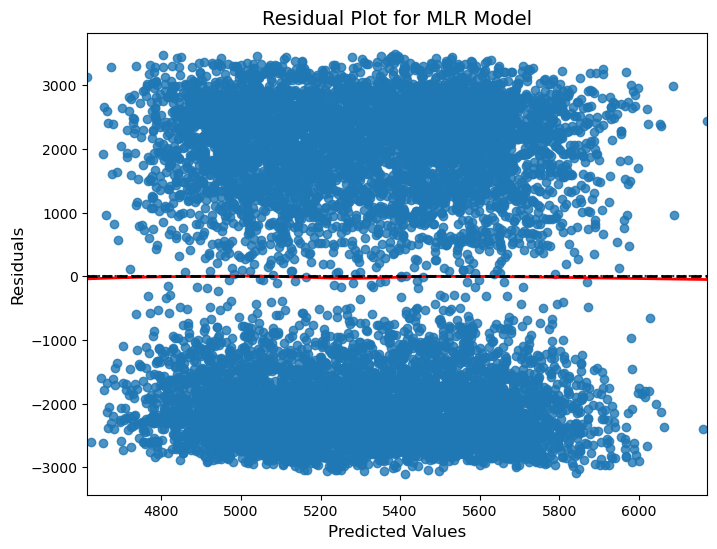

In [71]:
#residual plot
# Get the predicted values
predictions = model.predict(X)

# Calculate residuals
residuals = y - predictions

# Plot the residuals
plt.figure(figsize=(8, 6))
sns.residplot(x=predictions, y=residuals, lowess=True, 
              line_kws={'color': 'red', 'lw': 2})  # lowess smooths the plot

plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residual Plot for MLR Model', fontsize=14)
plt.axhline(0, color='black', linestyle='--', lw=2)  # Add horizontal line at 0
plt.show()

In [72]:
RSE_summary = np.sqrt(final_model.mse_resid)
print(f'Residual Standard Error (from summary): {RSE_summary:.4f}')

Residual Standard Error (from summary): 2164.1035
